<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

## *Data Science Unit 4 Sprint 4*

# Sprint Challenge
### RNNs, CNNs, GANS, and AutoML

In this Sprint Challenge, you'll explore some of the cutting edge of Data Science. *Caution* - these approaches can be pretty heavy computationally. All problems are designed to completed with 5-10 minutes of run time on most machines. If you approach takes longer, please double check your work. 

In [1]:
!pip install twitterscraper google_images_download tpot xgboost

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Part 1 - RNNs

Use an RNN to fit a classification model on tweets to distinguish from tweets from any two accounts. The following code sample illustrates how to access data from an account (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper): 

#### Install Dependencies

Your Tasks:
* Select two twitter accounts to gather data from
* Use twitterscraper to get ~1,000 tweets from each account
* Encode the characters to a sequence of integers for the model
* Get the data into the appropriate shape/format, including labels and a train/test split
* Use Keras to fit a predictive model, classying tweets as being from one acount or the other
* Report your overall score and accuracy

For reference, the [Keras IMDB classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the RNN code we used in class.

Note - focus on getting a running model, not on making accuracy with extreme data size or epoch numbers. Fit a baseline model based on tweet text. Only revisit and push accuracy or incorporate additional features if you get everything else done!

#### Import Dependencies

In [17]:
from twitterscraper import query_tweets
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import logging
import string

In [33]:
logger = logging.getLogger('twitterscraper')
logger.disabled = True

#### Download Data

In [34]:
austen = query_tweets('from:austen', 1000)
elon = query_tweets('from:elonmusk', 1000)

In [35]:
austen[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [36]:
elon[0].text

'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'

#### Preprocess

In [131]:
tweets = [tweet.text for tweet in austen] + [tweet.text for tweet in elon]

In [132]:
longest_tweet = max([len(tweet) for tweet in tweets])

In [133]:
alphabet = sorted(list(set(' '.join(tweets) + string.printable)))

In [134]:
char_to_index = dict([(c, i) for i, c in enumerate(alphabet)])
index_to_char = dict(enumerate(alphabet))

In [135]:
encoded_tweets = [[char_to_index[c] for c in tweet] for tweet in tweets]

In [136]:
len(austen), len(elon), len(tweets)

(182, 722, 904)

In [149]:
X = tf.keras.preprocessing.sequence.pad_sequences(encoded_tweets, maxlen=longest_tweet)

In [150]:
y = (np.arange(len(austen) + len(elon)) < len(austen)).astype(np.int).reshape(-1, 1)

In [151]:
X.shape, y.shape

((904, 346), (904, 1))

#### Build Model

In [152]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [153]:
max_features = 2000

In [157]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 128))
model.add(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [158]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train Model

In [159]:
model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 678 samples, validate on 226 samples
Epoch 1/15
678/678 [==============================] - 15s 22ms/step - loss: 0.6036 - acc: 0.8009 - val_loss: 0.5497 - val_acc: 0.7743
Epoch 2/15
678/678 [==============================] - 14s 20ms/step - loss: 0.4946 - acc: 0.8068 - val_loss: 0.5159 - val_acc: 0.7743
Epoch 3/15
678/678 [==============================] - 14s 20ms/step - loss: 0.4686 - acc: 0.8068 - val_loss: 0.5002 - val_acc: 0.7743
Epoch 4/15
678/678 [==============================] - 14s 20ms/step - loss: 0.4636 - acc: 0.8068 - val_loss: 0.4895 - val_acc: 0.7743
Epoch 5/15
678/678 [==============================] - 14s 20ms/step - loss: 0.4431 - acc: 0.8097 - val_loss: 0.4801 - val_acc: 0.7743
Epoch 6/15
678/678 [==============================] - 14s 20ms/step - loss: 0.4170 - acc: 0.8127 - val_loss: 0.4781 - val_acc: 0.7788
Epoch 7/15
678/678 [==============================] - 14s 20ms/step - loss: 0.4062 - acc: 0.8245 - val_loss: 0.4903 - val_acc: 0.7832
Epoch 8/15
678/6

#### Evaluate Model

In [162]:
score, acc = model.evaluate(X_test, y_test, batch_size=32)

226/226 [==============================] - 1s 3ms/step


In [163]:
score, acc

(0.4194166697232069, 0.8230088495575221)

In [169]:
ryan = query_tweets('from:rrherr', 1)[0].text

In [190]:
austen_probability = model.predict(tf.keras.preprocessing.sequence.pad_sequences([[char_to_index[c] for c in ryan]], maxlen=longest_tweet))
elon_probability = 1 - austen_probability

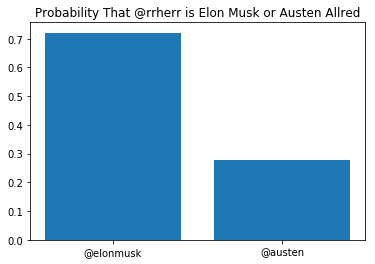

In [308]:
plt.bar(['@elonmusk', '@austen'], np.append(elon_probability, austen_probabiliy))
plt.title("Probability That @rrherr is Elon Musk or Austen Allred");

## Part 2 - CNNs
Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

At the time of writing at least a few do, but since the internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is validly run ResNet50 on the input images - don't worry about tuning or improving the model. 

*Hint:* ResNet 50 doesn't just return "frog". The three labels it has for frogs are bullfrog, tree frog, and tailed frog.

Stretch goal - also check for fish.

#### Import Dependencies

In [7]:
from google_images_download import google_images_download
from tensorflow.keras.applications import resnet50
import tensorflow as tf

In [88]:
response = google_images_download.googleimagesdownload()
arguments = {'keywords': "animal pond", "limit": 20, "print_urls": True}
filepaths, status = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 3.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 4.PKLS4116_inline.png
Image URL: http://images.animalpicturesociety.com/images/5d/alligator_animal_on_pond.jpg
Completed Image ====> 5.alligator_animal_on_pond.jpg
Image URL: https://cdn.pixabay.com/photo/2017/04/19/20/37/frog-2243543_960_720.jpg
Completed Image ====> 6.frog-2243543_960_720.jpg
Image URL: h

In [89]:
paths = np.random.choice(filepaths['animal pond'], 5, replace=False)

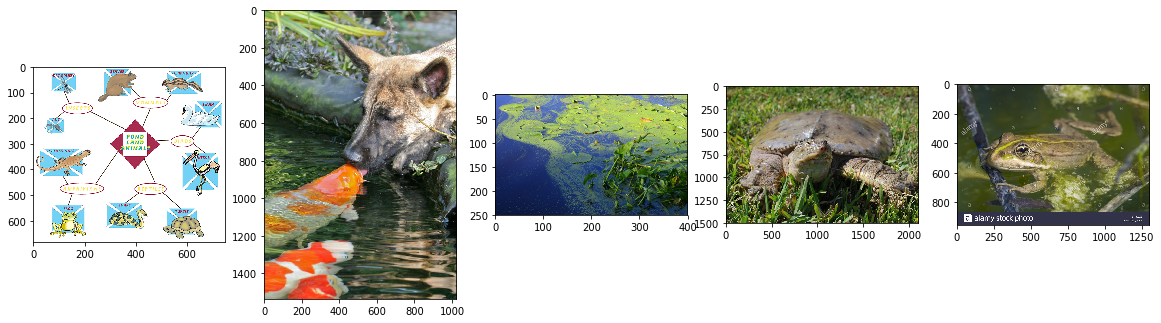

In [90]:
fig, axes = plt.subplots(1, len(paths), figsize=(20,20))

for ax, path in zip(axes, paths):
    ax.imshow(plt.imread(path))

In [91]:
files = [tf.keras.preprocessing.image.load_img(path,  target_size=(224, 224)) for path in paths]

In [92]:
images = [np.expand_dims(tf.keras.preprocessing.image.img_to_array(file), axis=0) for file in files]

In [93]:
model = resnet50.ResNet50()

In [94]:
preds = [model.predict(image) for image in images]

In [95]:
predicted_labels = [{label: prob for id, label, prob in tf.keras.applications.resnet50.decode_predictions(pred, top=5)[0]} for pred in preds]

Text(0.5,1,'Label Probabilities For Image 2')

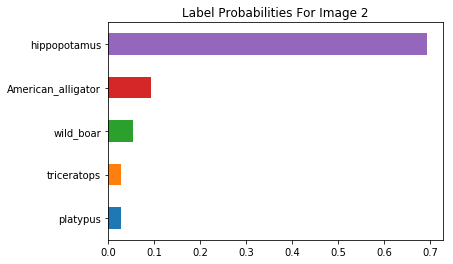

In [105]:
pd.Series(predicted_labels[1]).sort_values().plot.barh()
plt.title("Label Probabilities For Image 2");

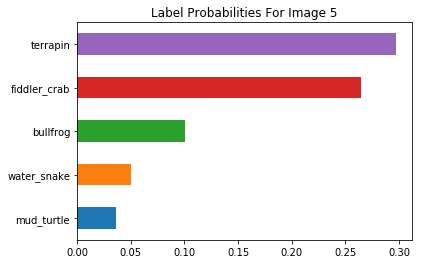

In [106]:
pd.Series(predicted_labels[4]).sort_values().plot.barh()
plt.title("Label Probabilities For Image 5");

## Part 3 - AutoML

Use [TPOT](https://epistasislab.github.io/tpot/) to fit a predictive model for the King County housing data, with `price` as the target output variable.

As with previous questions, your goal is to run TPOT and successfully run and report error at the end. Also, in the interest of time, feel free to choose small `generation=1`and `population_size=10` parameters, so your pipeline runs efficiently. You will want to be able to iterate and test. 

*Hint:* You will have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running - as long as you still get a valid model with reasonable predictive power. 

In [2]:
from sklearn import model_selection
import pandas as pd
import tpot as tp

In [8]:
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

In [9]:
df['date'] = pd.to_datetime(df.date).dt.strftime("%Y%m%d").astype(np.int)

In [10]:
X = df.drop(columns="price")
y = df.price

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [12]:
regressor = tp.TPOTRegressor(generations=50, n_jobs=-1, verbosity=4)

In [13]:
regressor.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


29 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19']
expected lat, grade, sqft_lot15, floors, date, bedrooms, yr_renovated, sqft_above, condition, bathrooms, yr_built, sqft_living15, view, id, waterfront, long, sqft_lot, sqft_living, zipcode, sqft_basement in input data
training data did not have the following fields: f4, f10, f1, f2, f13, f0, f17, f6, f11, f15, f3, f7, f8, f9, f5, f18, f12, f14, f19, f16.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=50,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=-1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=100,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=4,
       warm_start=False)

In [14]:
regressor.score(X_test, y_test)

-13441521983.313375

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
metrics.r2_score(y_test, y_pred)

0.8916829562912976

In [26]:
metrics.mean_squared_error(y_test, y_pred)

13441521983.313375

## Part 4 - More... 

Answer the following questions, with a target audience of a fellow Data Scientist:
* What do you consider your strongest area as a Data Scientist? 
* What area of Data Science would you most like to learn more about and why? 
* Where do you think Data Science will be in 5 years? 

A few sentences per answer is fine. Only elaborate if time allows. Use markdown to format your answers.

Thank you for your hard, and congratulations!! You've learned a lot, and you should proudly call yourself a Data Scientist. 

What do you consider your strongest area as a Data Scientist?:
  * Data exploration, model building, and model validation seem to be the areas where I execute most<br>
    strongly. Each one of these steps in the modeling process inform and allow for refinement of the<br>
    other two, hence I perform strong in these areas because of the tight feedback loop between them.<br>

What area of Data Science would you most like to learn more about and why?:
  * Topological data analysis, bayesian modeling, and reinforcement learning are the<br>
    areas I'm excited to look into. Relative to most of the approaches to analyzing data sets, taking into<br>
    account the geometric structure of the data seems to be undervalued at the moment, and could probably<br>
    stand to be more broadly applied. Especially with respect to build deep nets which rely on the topology<br>
    of the error function to optimize. Bayesian modeling is useful in that it allows you to encode uncertainty<br>
    into the formulation of a problem, allowing for a kind of epistemic honesty that's preserved throughout<br>
    the problem. Maybe we get a certain model score, but it would be even better to have that paired with out<br>
    uncerainty about the information we've included as well. Lastly, reinforcement learning is starting to grow<br>
    at a rapid step and hence lots of interesting research is coming out of that area.<br>

Where do you think Data Science will be in 5 years?:
  * Many of the methods and statistics we use today are pretty mechanistic and are well-served
    to automation. As CPUs and GPUs specialize to problems, automating naive nth order statistical
    analysis will become the standard, likely doing better than statisticians ever could on there
    own. Encoding uncertainty about the world requires knowing, a priori, about the world, which
    models do not, hence bayesian analysis, information theory, and higher level meta-statistics
    will probably be brought to the fore in an approximately ~5 year timeline.
    